In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv('./Data/test.csv')

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df_train.describe().transpose()

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

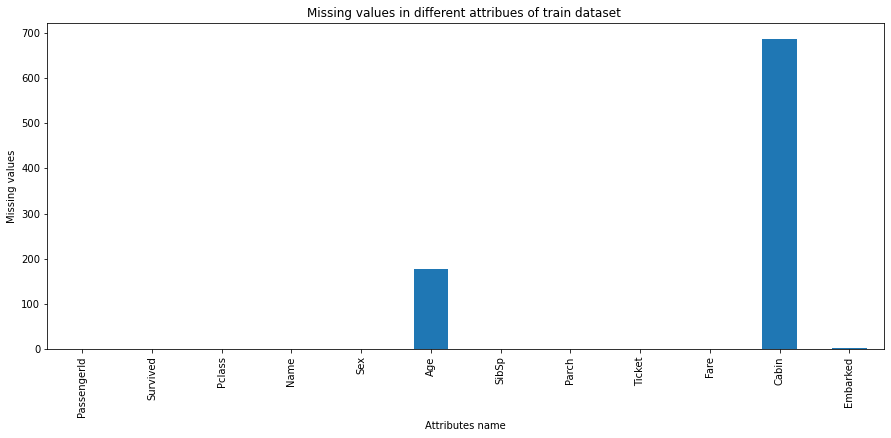

In [6]:
plt.figure(figsize=(15,6))
plt.xlabel("Attributes name")
plt.ylabel("Missing values")
plt.title("Missing values in different attribues of train dataset ")
df_train.isnull().sum().plot(kind='bar')

In [7]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

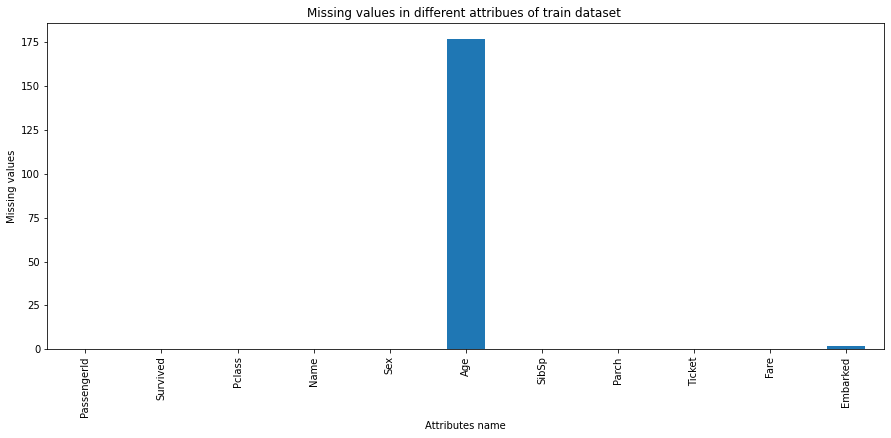

In [8]:
plt.figure(figsize=(15,6))
plt.xlabel("Attributes name")
plt.ylabel("Missing values")
plt.title("Missing values in different attribues of train dataset ")
df_train.isnull().sum().plot(kind='bar')

In [9]:
df_train = df_train[df_train['Embarked'].notnull()]

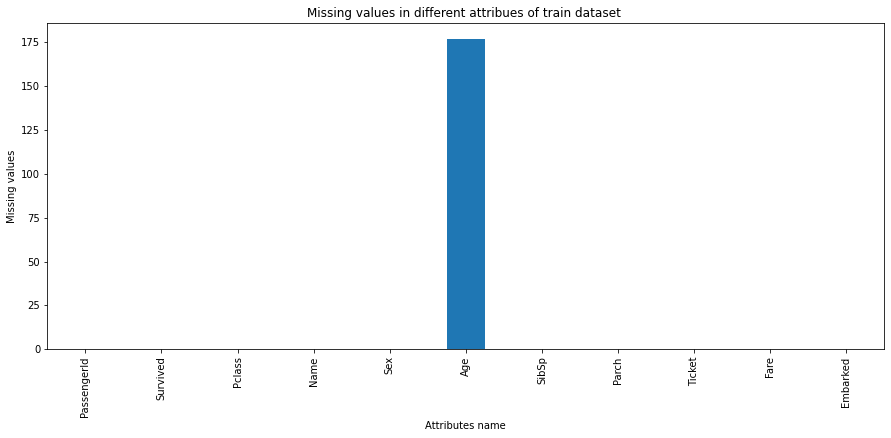

In [10]:
plt.figure(figsize=(15,6))
plt.xlabel("Attributes name")
plt.ylabel("Missing values")
plt.title("Missing values in different attribues of train dataset ")
df_train.isnull().sum().plot(kind='bar')

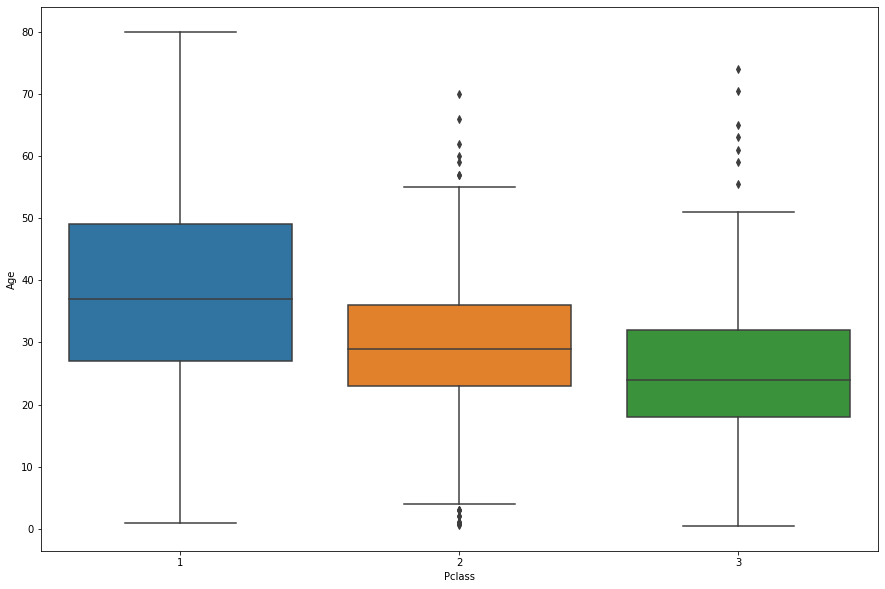

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(y=df_train['Age'], x=df_train['Pclass'])

In [12]:
# above graph helps to find avg age of a person travelling in a class
# Like in 1st class passengers are having an avg age of 37
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            Age=37
        elif Pclass == 2:
            Age=29
        elif Pclass == 3:
            Age = 25
    return Age

In [13]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_Age, axis=1)

In [14]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_Age, axis=1)

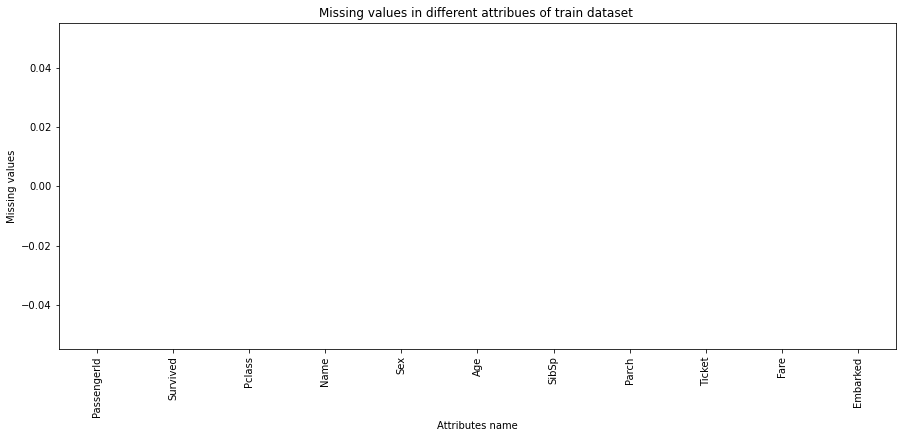

In [15]:
plt.figure(figsize=(15,6))
plt.xlabel("Attributes name")
plt.ylabel("Missing values")
plt.title("Missing values in different attribues of train dataset ")
df_train.isnull().sum().plot(kind='bar')

In [16]:
#No missing values 
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
Embark=pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train=pd.concat([df_train,sex,Embark],axis=1)

In [17]:
sex=pd.get_dummies(df_test['Sex'],drop_first=True)
Embark=pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test=pd.concat([df_test,sex,Embark],axis=1)

In [18]:
id = df_test['PassengerId']

In [19]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [20]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [21]:
df_train.drop(['Sex','Embarked'], axis=1,inplace=True)
df_test.drop(['Sex','Embarked'], axis=1,inplace=True)


In [22]:
print(df_train.columns)
print(f"No. of columns : {len(df_train.columns)}")


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')
No. of columns : 9


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_train.drop('Survived', axis=1).values
y= df_train['Survived'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
model = Sequential()

model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train , y=y_train, epochs = 400, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/400
6/6 [==============================] - 3s 431ms/step - loss: 0.6984 - val_loss: 0.6911
Epoch 2/400
6/6 [==============================] - 0s 17ms/step - loss: 0.6881 - val_loss: 0.6818
Epoch 3/400
6/6 [==============================] - 0s 18ms/step - loss: 0.6792 - val_loss: 0.6728
Epoch 4/400
6/6 [==============================] - 0s 15ms/step - loss: 0.6691 - val_loss: 0.6645
Epoch 5/400
6/6 [==============================] - 0s 14ms/step - loss: 0.6578 - val_loss: 0.6567
Epoch 6/400
6/6 [==============================] - 0s 17ms/step - loss: 0.6529 - val_loss: 0.6495
Epoch 7/400
6/6 [==============================] - 0s 26ms/step - loss: 0.6478 - val_loss: 0.6427
Epoch 8/400
6/6 [==============================] - 0s 25ms/step - loss: 0.6327 - val_loss: 0.6363
Epoch 9/400
6/6 [==============================] - 0s 25ms/step - loss: 0.6352 - val_loss: 0.6302
Epoch 10/400
6/6 [==============================] - 0s 22ms/step - loss: 0.6252 - val_loss: 0.6243
Epoch 11/400
6/6 [

Epoch 84/400
6/6 [==============================] - 0s 18ms/step - loss: 0.4469 - val_loss: 0.4473
Epoch 85/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4521 - val_loss: 0.4440
Epoch 86/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4456 - val_loss: 0.4421
Epoch 87/400
6/6 [==============================] - 0s 18ms/step - loss: 0.4534 - val_loss: 0.4419
Epoch 88/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4703 - val_loss: 0.4411
Epoch 89/400
6/6 [==============================] - 0s 21ms/step - loss: 0.4603 - val_loss: 0.4406
Epoch 90/400
6/6 [==============================] - 0s 26ms/step - loss: 0.4580 - val_loss: 0.4438
Epoch 91/400
6/6 [==============================] - 0s 28ms/step - loss: 0.4364 - val_loss: 0.4444
Epoch 92/400
6/6 [==============================] - 0s 27ms/step - loss: 0.4386 - val_loss: 0.4401
Epoch 93/400
6/6 [==============================] - 0s 28ms/step - loss: 0.4550 - val_loss: 0.4379
Epoch 94/4

6/6 [==============================] - 0s 17ms/step - loss: 0.4434 - val_loss: 0.4112
Epoch 166/400
6/6 [==============================] - 0s 15ms/step - loss: 0.4270 - val_loss: 0.4137
Epoch 167/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4248 - val_loss: 0.4139
Epoch 168/400
6/6 [==============================] - 0s 18ms/step - loss: 0.4372 - val_loss: 0.4103
Epoch 169/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4442 - val_loss: 0.4115
Epoch 170/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4389 - val_loss: 0.4120
Epoch 171/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4262 - val_loss: 0.4132
Epoch 172/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4103 - val_loss: 0.4095
Epoch 173/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4337 - val_loss: 0.4078
Epoch 174/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4350 - val_loss: 0.4092
Epoch 175/400


6/6 [==============================] - 0s 17ms/step - loss: 0.4401 - val_loss: 0.3955
Epoch 248/400
6/6 [==============================] - ETA: 0s - loss: 0.439 - 0s 17ms/step - loss: 0.4322 - val_loss: 0.3976
Epoch 249/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4213 - val_loss: 0.3971
Epoch 250/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4404 - val_loss: 0.3954
Epoch 251/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4087 - val_loss: 0.3955
Epoch 252/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4290 - val_loss: 0.3974
Epoch 253/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4233 - val_loss: 0.3939
Epoch 254/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4449 - val_loss: 0.3933
Epoch 255/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4486 - val_loss: 0.3934
Epoch 256/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4112 - val_los

6/6 [==============================] - 0s 16ms/step - loss: 0.4361 - val_loss: 0.3870
Epoch 329/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4392 - val_loss: 0.3858
Epoch 330/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4167 - val_loss: 0.3861
Epoch 331/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4189 - val_loss: 0.3865
Epoch 332/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4017 - val_loss: 0.3858
Epoch 333/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3972 - val_loss: 0.3831
Epoch 334/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3980 - val_loss: 0.3827
Epoch 335/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4329 - val_loss: 0.3830
Epoch 336/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4277 - val_loss: 0.3827
Epoch 337/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4030 - val_loss: 0.3839
Epoch 338/400


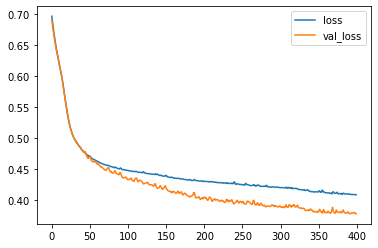

In [33]:
pd.DataFrame(model.history.history).plot()

In [34]:
predictions = model.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       136
           1       0.88      0.67      0.76        87

    accuracy                           0.83       223
   macro avg       0.85      0.80      0.82       223
weighted avg       0.84      0.83      0.83       223



In [37]:
print(confusion_matrix(y_test,predictions))

[[128   8]
 [ 29  58]]


In [38]:
df_test.head()

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  34.5      0      0   7.8292     1  1  0
1       3  47.0      1      0   7.0000     0  0  1
2       2  62.0      0      0   9.6875     1  1  0
3       3  27.0      0      0   8.6625     1  0  1
4       3  22.0      1      1  12.2875     0  0  1

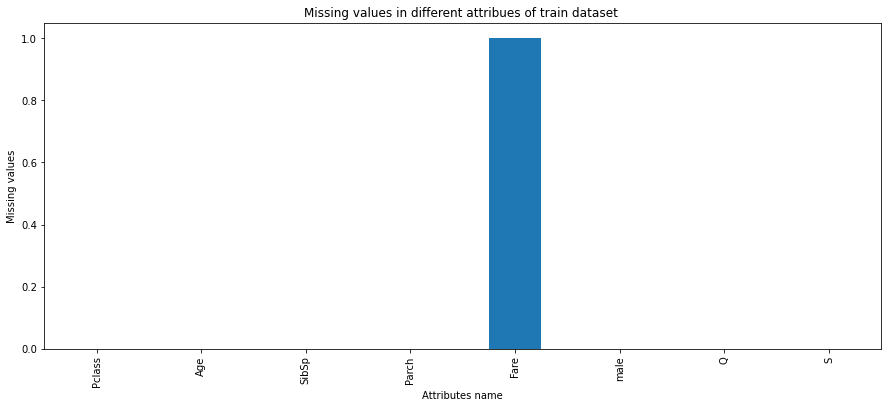

In [39]:
plt.figure(figsize=(15,6))
plt.xlabel("Attributes name")
plt.ylabel("Missing values")
plt.title("Missing values in different attribues of train dataset ")
df_test.isnull().sum().plot(kind='bar')

In [40]:
df_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [41]:
predictions =model.predict_classes(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
df_res = pd.DataFrame(id)

In [43]:
df_res['Survived'] = predictions 

In [44]:
df_res

PassengerId  Survived
0            892         0
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         0
416         1308         1
417         1309         1

[418 rows x 2 columns]

In [45]:
df_res.to_csv('./titanicSub.csv', index=False)

In [46]:
df_res.shape

(418, 2)

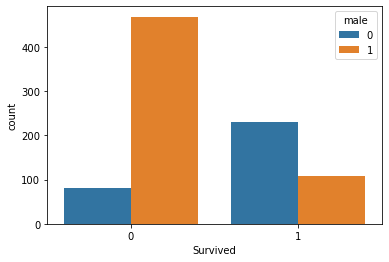

In [51]:
sns.countplot(df_train['Survived'], hue=df_train['male'])